In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [21]:
dfsujo = pd.read_csv('C:/projeto1/analise_exploratoria/data/celular2025.csv', encoding='ISO-8859-1')


In [22]:
dfsujo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

Limpeza do dataset

In [27]:
# 1. Converter colunas numéricas (remover unidades e transformar em float)
colunas_numericas = ["mobile_weight", "ram", "front_camera", "back_camera", "battery_capacity", "screen_size"]

for col in colunas_numericas:
    # Corrigir casos com múltiplos pontos
    df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)  # Remove tudo que não for número ou ponto
    df[col] = df[col].apply(lambda x: x if x.count('.') <= 1 else x.split('.')[0] + '.' + x.split('.')[1])  # Corrige múltiplos pontos
    
    # Tentar converter para float
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Valores inválidos se tornarão NaN

# 2. Converter preços para números (removendo moedas e separadores de milhar)
colunas_precos = ["price_pakistan", "price_india", "price_china", "price_usa", "price_dubai"]
for col in colunas_precos:
    # Substituir strings vazias por NaN
    df[col] = df[col].replace("", pd.NA)
    
    # Remover unidades e símbolos
    df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    
    # Converter para float e lidar com erros
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Criar nova coluna com preço médio
df["avg_price"] = df[colunas_precos].mean(axis=1)

# 4. Substituir valores NaN por 0
df.fillna(0, inplace=True)

# 5. Salvar dataset limpo
df.to_csv('C:/projeto1/analise_exploratoria/data/celular2025_clean.csv', index=False)


In [28]:
df = pd.read_csv('C:/projeto1/analise_exploratoria/data/celular2025_clean.csv')

In [29]:
df.info

<bound method DataFrame.info of      company                 model  mobile_weight   ram  front_camera  \
0      Apple       iPhone 16 128GB          174.0   6.0          12.0   
1      Apple       iPhone 16 256GB          174.0   6.0          12.0   
2      Apple       iPhone 16 512GB          174.0   6.0          12.0   
3      Apple  iPhone 16 Plus 128GB          203.0   6.0          12.0   
4      Apple  iPhone 16 Plus 256GB          203.0   6.0          12.0   
..       ...                   ...            ...   ...           ...   
925     Poco          Pad 5G 128GB          571.0   8.0           8.0   
926     Poco          Pad 5G 256GB          571.0   8.0           8.0   
927  Samsung  Galaxy Z Fold6 256GB          239.0  12.0         104.0   
928  Samsung  Galaxy Z Fold6 512GB          239.0  12.0         104.0   
929  Samsung    Galaxy Z Fold6 1TB          239.0  12.0         104.0   

     back_camera            processor  battery_capacity  screen_size  \
0           48.0   

In [33]:
df.describe()

,mobile_weight,ram,front_camera,back_camera,battery_capacity,screen_size,price_pakistan,price_india,price_china,price_usa,price_dubai,launched_year,avg_price
count,930.000000,930.000000,930.000000,9.300000e+02,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,228.267097,9.513978,28.732903,3.722437e+04,5026.163441,7.083914,125301.186022,50576.818280,3821.430108,625.515763,2183.933333,2022.193548,36501.776701
std,105.432503,37.409896,74.141156,2.523503e+05,1355.548264,1.533667,101622.105232,40960.179361,2766.076655,1347.561211,1565.631642,1.862080,28757.440995
min,135.000000,1.000000,2.000000,5.000000e+00,2000.000000,5.000000,0.000000,5999.000000,499.000000,79.000000,299.000000,2014.000000,4575.000000
25%,185.000000,6.000000,8.000000,5.000000e+01,4402.500000,6.500000,54999.000000,19999.000000,1699.250000,250.000000,1000.000000,2021.000000,15438.500000
50%,194.000000,8.000000,16.000000,6.400000e+01,5000.000000,6.670000,84999.500000,34999.000000,2800.000000,449.000000,1675.000000,2023.000000,25449.000000
75%,208.000000,8.000000,32.000000,1.216000e+03,5091.250000,6.780000,179999.000000,74900.000000,5499.000000,849.000000,3199.000000,2024.000000,52204.000000
max,732.000000,812.000000,1212.000000,5.016132e+06,11200.000000,14.600000,604999.000000,274999.000000,17999.000000,39622.000000,11099.000000,2025.000000,158619.000000


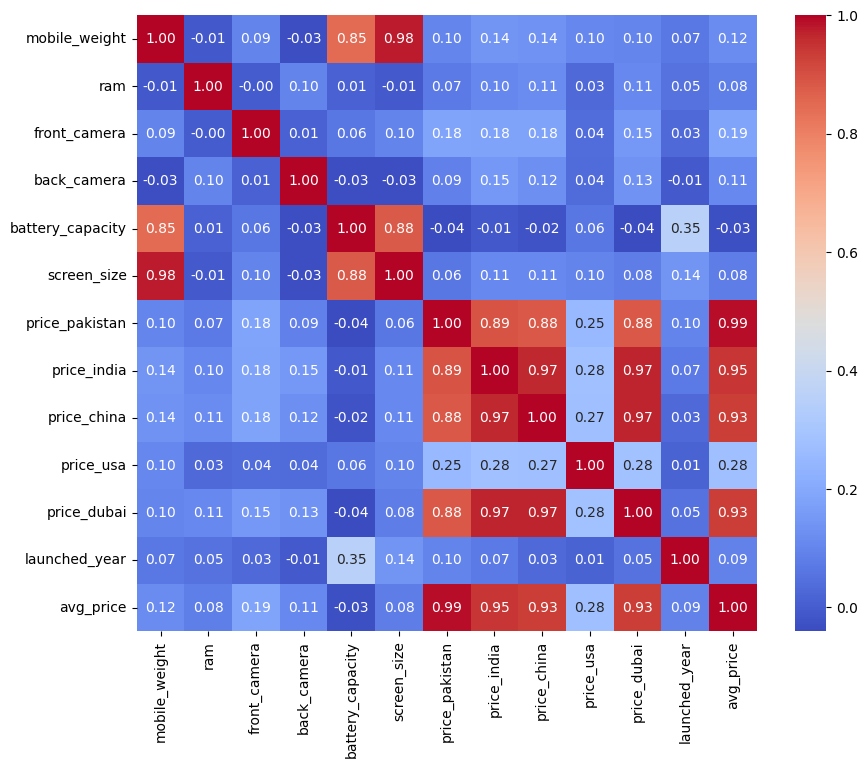

In [32]:
# Selecionando apenas colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

corr = df_numerico.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

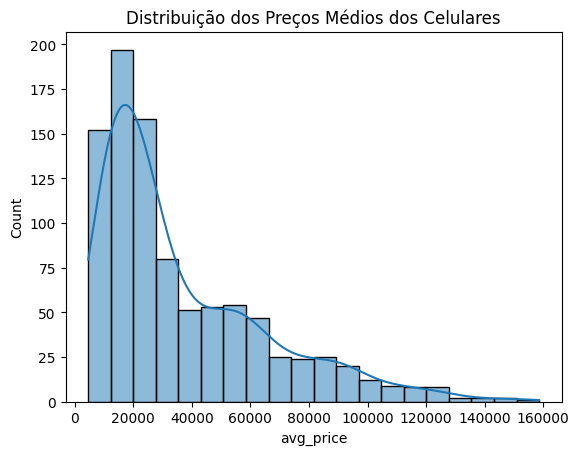

In [34]:
sns.histplot(df['avg_price'], bins=20, kde=True)
plt.title('Distribuição dos Preços Médios dos Celulares')
plt.show()

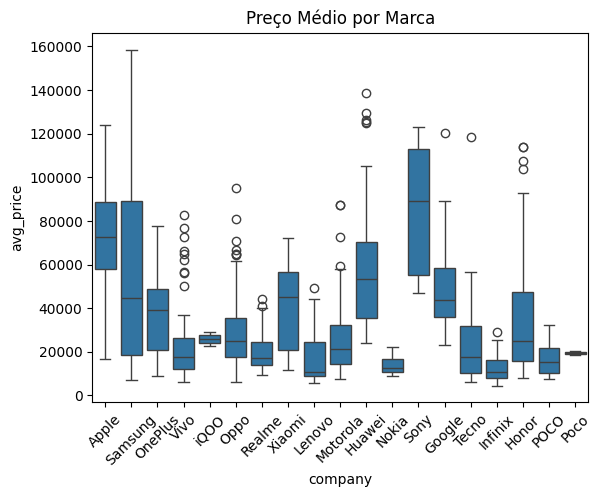

In [35]:
sns.boxplot(x='company', y='avg_price', data=df)
plt.xticks(rotation=45)
plt.title('Preço Médio por Marca')
plt.show()


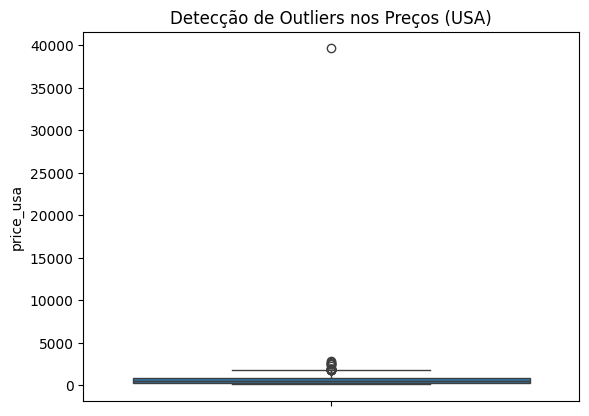

In [36]:
# Detecção de outliers
sns.boxplot(df['price_usa'])
plt.title('Detecção de Outliers nos Preços (USA)')
plt.show()
